In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta
from tqdm.notebook import tqdm

mpl.rcParams['figure.max_open_warning'] = 0
pd.set_option('display.max_rows', 100)

In [2]:
fig_size_1 = (16, 4)
fig_size_2 = (10, 4)
top_n = 30

today = datetime.today().strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
five_years = (datetime.today()-relativedelta(years=5)).strftime('%Y-%m-%d')
ten_years = (datetime.today()-relativedelta(years=10)).strftime('%Y-%m-%d')
twenty_years = (datetime.today()-relativedelta(years=20)).strftime('%Y-%m-%d')
thirty_years = (datetime.today()-relativedelta(years=30)).strftime('%Y-%m-%d')
fifty_years = (datetime.today()-relativedelta(years=30)).strftime('%Y-%m-%d')
nineteen_seventy = '1970-01-02'

start_date = thirty_years
end_date = today

ma_period_1 = 255

In [3]:
def get_dma_analysis(ticker, ma_period, start_date=start_date, end_date=end_date):
    df = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()
    df['DMA'] = df['Close'].rolling(ma_period).mean()
    df['PCH_DMA'] = 100*(df['Close']-df['DMA'])/df['DMA']
    df['PCH_DMA_MEAN'] = df['PCH_DMA'].mean()
    df['PCH_DMA_MEDIAN'] = df['PCH_DMA'].median()
    df = df.round(3)
    return df
        
def plot_dma_analysis(df, start_date=start_date, end_date=end_date, title=''):
    df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].plot(
        x='Date', y=['Close', 'DMA'], style = ['-', '--'],
        figsize=fig_size_1, grid=True, title=title+' (price)')
    df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].plot(
        x='Date', y=['PCH_DMA', 'PCH_DMA_MEAN', 'PCH_DMA_MEDIAN'], style=['-', '--', '--'],
        figsize=fig_size_1, grid=True, title=title+' (DMA)')
    
def plot_dma_hist(df, bins=100, title=''):
    df.plot(x='Date', y=['PCH_DMA'], kind='hist', bins=bins,
            figsize=fig_size_1, grid=True, title=title+' (DMA hist)')
    
def get_dma_percentile(df, bins=100):
    current_pch_dma_rank_percentile = round(100*df['PCH_DMA'].dropna().rank(axis=0).tail(1).values[0]/len(df['PCH_DMA'].dropna()), 2)
    return(current_pch_dma_rank_percentile)

def get_dma_tickers(tickers, ma_period, start_date=start_date):
    a, b, c, d, e, f = ([] for i in range(6))
    for ticker in tqdm(tickers):
        try:
            df = get_dma_analysis(ticker=ticker, ma_period=ma_period, start_date=start_date)
            a.append(get_dma_percentile(df))
            b.append(df[['PCH_DMA']].tail(1).values[0][0])
            c.append(df[['PCH_DMA_MEAN']].tail(1).values[0][0])
            d.append(df[['PCH_DMA_MEDIAN']].tail(1).values[0][0])
            e.append(df[['Close']].tail(1).values[0][0])
            f.append(df[['DMA']].tail(1).values[0][0])
        except:
            print(ticker)
    df = pd.DataFrame()
    df['ticker'] = tickers
    df['percentile'] = a
    df['pch'] = b
    df['pch_mean'] = c
    df['pch_median'] = d
    df['close'] = e
    df['dma'] = f    
    return df

def analyze_ticker_dma(ticker, ma_period, start_date=start_date):    
    df = get_dma_analysis(ticker=ticker, ma_period=ma_period, start_date=start_date)
    plot_dma_analysis(df, start_date=start_date, title=ticker)
    print(ticker+' DMA percentile:', get_dma_percentile(df))
    plot_dma_hist(df, title=ticker)

In [4]:
my_tickers = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER', 'BA', 'DAL', 'UAL', 'AAL', 'XOM',
              'XLE', 'XLU', 'IVV', 'VNQ', 'VCSH',
              '^GSPC','SMH', 'QQQ', 'SHV', 'MCHI', 'INDA', 'INR=X', 'CL=F', 'GC=F', 'BTC-USD',
              'BRK-B', 'TSLA', 'V', 'JPM', 'JNJ', 'WMT', 'MA', 'DIS', 'UNH', 'BAC', 'PG', 'NVDA', 'PYPL',
              'CMCSA', 'INTC', 'NFLX', 'KO', 'T', 'CVX', 'ORCL', 'CSCO', 'PEP', 'WFC', 'C', 'SBUX',
              'SCHW', 'GE', 'AXP', 'GS', 'IBM', 'MU', 'LMT', 'AMD', 'BKNG', 'TWTR', 'SPOT', 'EXPE', 
              'XLK', 'XLV', 'XLC', 'XLY', 'XLF', 'XLI', 'XLP', 'XLRE', 'XLB', 'VGSH', 'BND',
              'TCEHY', 'BABA', 'TSM', 'JD',
              'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'SBIN.NS', 'ITC.NS', 'ONGC.NS',
              'VEA', 'VWO', 'VXUS']

my_portfolio = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER', 'BA', 'DAL', 'UAL', 'AAL', 'XOM',
              'XLE', 'XLU', 'IVV', 'VNQ', 'VCSH', 'BABA']

sectors = ['XLK', 'XLV', 'XLY', 'XLC', 'XLF', 'XLI', 'XLP', 'XLU', 'XLB', 'XLE', 'XLRE', 'SPY']

bonds = ['SHV', 'MBB', 'TIP', 'VCSH', 'VGSH', 'VCIT', 'VGIT', 'VCLT', 'VGLT', 'BSV', 'BIV', 'BLV', 'BND', 'BNDX']

dma_tickers = ['^GSPC', 'BND', 'AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'BA', 'XOM', 'BABA',
               'VNQ', 'VCSH', 'VGLT', 'SHV', '^TNX', 'BTC-USD', 'GC=F', 'CL=F',
               'MCHI', 'INDA', 'INR=X', 'RELIANCE.NS']

  0%|          | 0/17 [00:00<?, ?it/s]

<AxesSubplot:xlabel='ticker'>

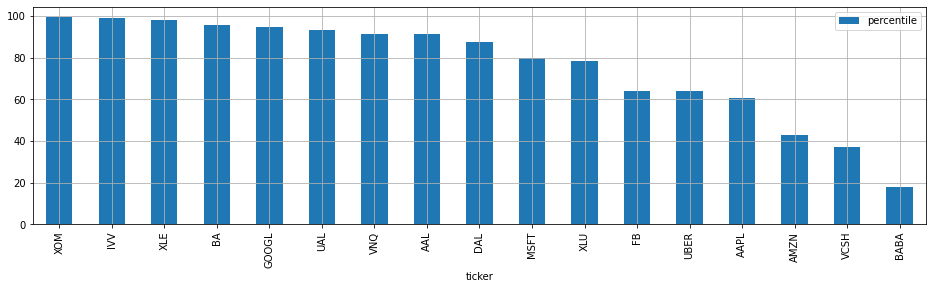

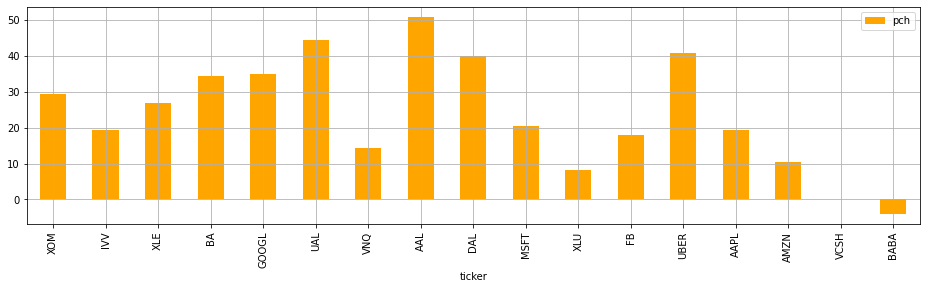

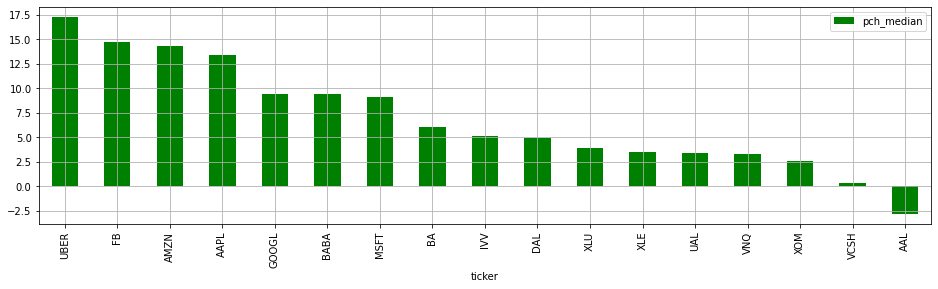

In [5]:
df_my_portfolio = get_dma_tickers(my_portfolio, ma_period=ma_period_1, start_date=start_date)

df_my_portfolio.sort_values(by='percentile', ascending=False).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_1, grid=True)
df_my_portfolio.sort_values(by='percentile', ascending=False).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_1, grid=True, color='orange')

df_my_portfolio.sort_values(by='pch_median', ascending=False).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_1, grid=True, color='green')

  0%|          | 0/88 [00:00<?, ?it/s]

<AxesSubplot:xlabel='ticker'>

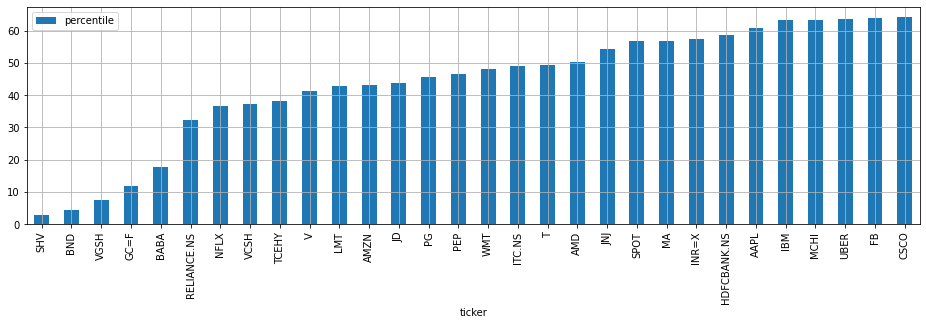

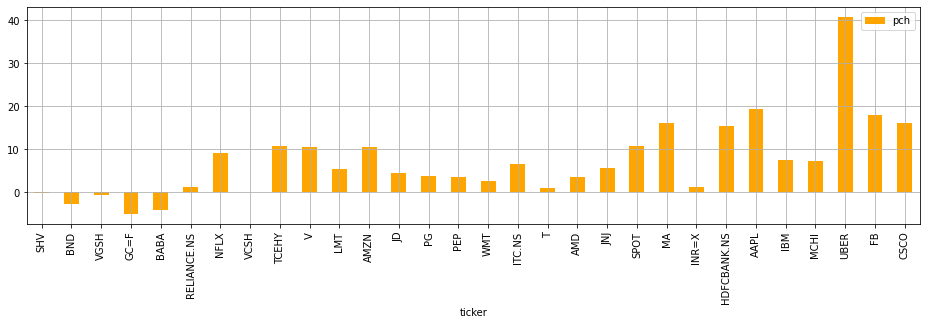

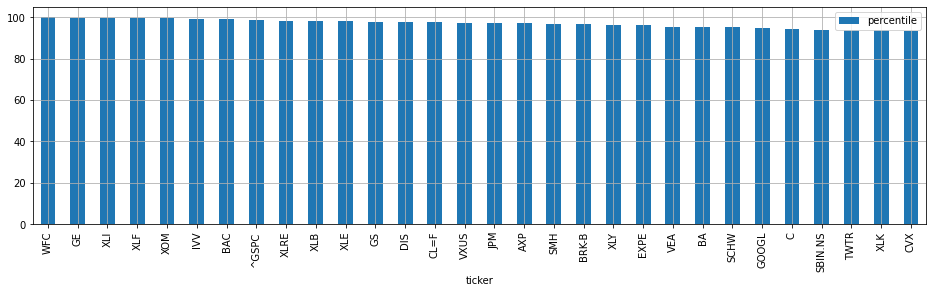

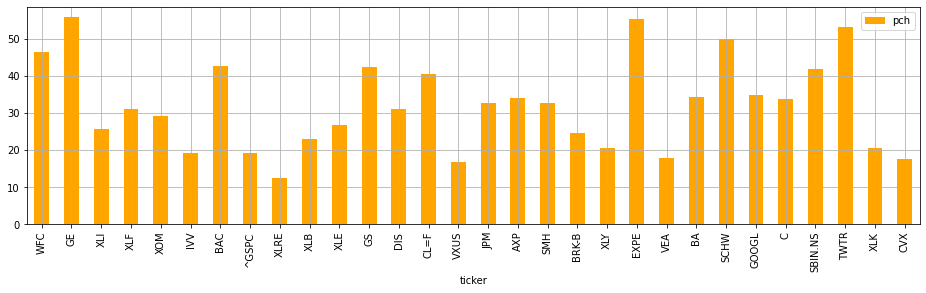

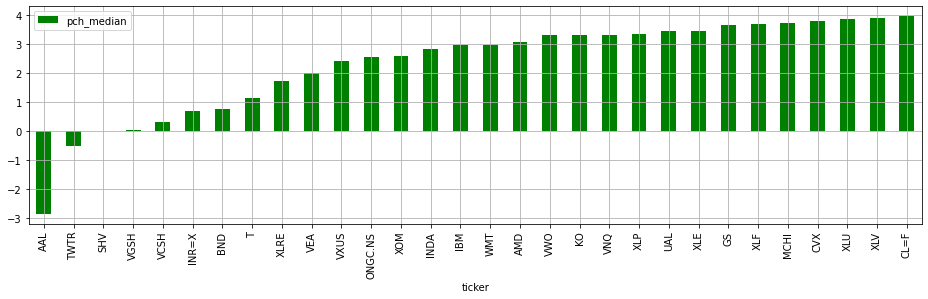

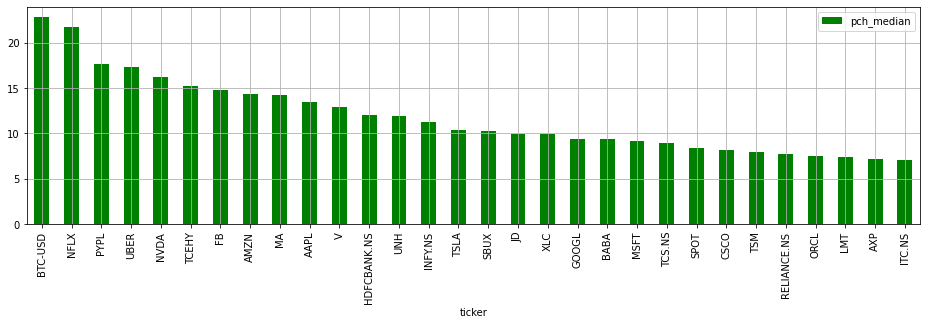

In [6]:
df_my_tickers = get_dma_tickers(my_tickers, ma_period=ma_period_1, start_date=start_date)

df_my_tickers.sort_values(by='percentile', ascending=True).head(top_n).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_1, grid=True)
df_my_tickers.sort_values(by='percentile', ascending=True).head(top_n).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_1, grid=True, color='orange')

df_my_tickers.sort_values(by='percentile', ascending=False).head(top_n).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_1, grid=True)
df_my_tickers.sort_values(by='percentile', ascending=False).head(top_n).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_1, grid=True, color='orange')

df_my_tickers.sort_values(by='pch_median', ascending=True).head(top_n).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_1, grid=True, color='green')
df_my_tickers.sort_values(by='pch_median', ascending=False).head(top_n).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_1, grid=True, color='green')

  0%|          | 0/12 [00:00<?, ?it/s]

<AxesSubplot:xlabel='ticker'>

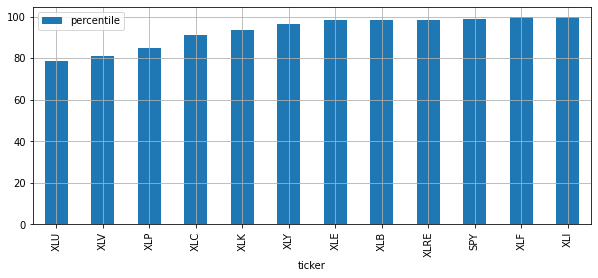

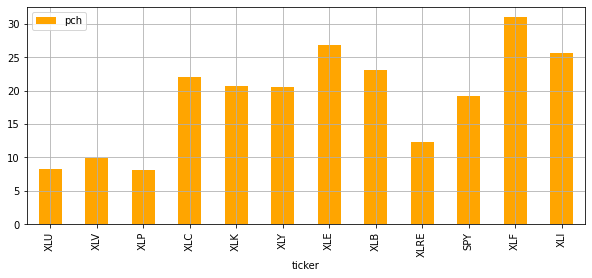

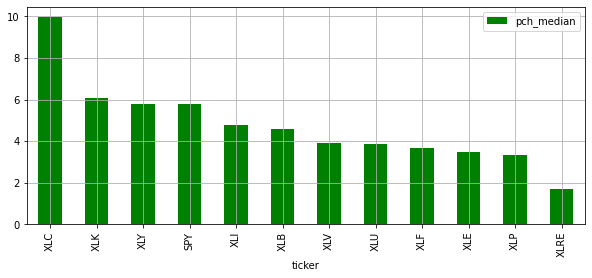

In [7]:
df_sectors = get_dma_tickers(sectors, ma_period=ma_period_1, start_date=start_date)

df_sectors.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_2, grid=True)
df_sectors.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_2, grid=True, color='orange')

df_sectors.sort_values(by='pch_median', ascending=False).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_2, grid=True, color='green')

  0%|          | 0/14 [00:00<?, ?it/s]

<AxesSubplot:xlabel='ticker'>

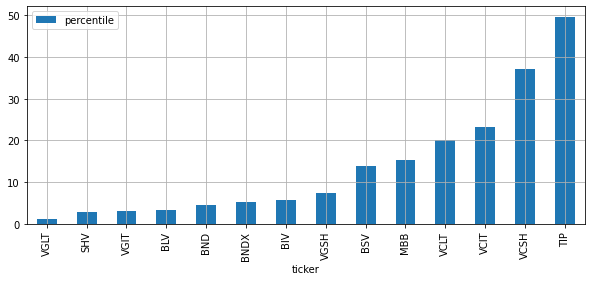

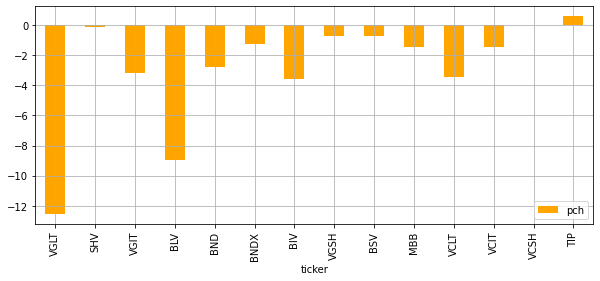

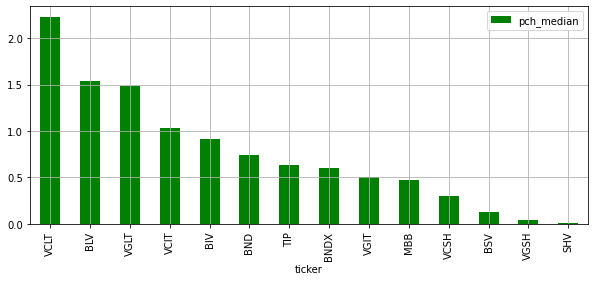

In [8]:
df_bonds = get_dma_tickers(bonds, ma_period=ma_period_1, start_date=start_date)

df_bonds.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['percentile'], kind='bar', figsize=fig_size_2, grid=True)
df_bonds.sort_values(by='percentile', ascending=True).plot(
    x='ticker', y=['pch'], kind='bar', figsize=fig_size_2, grid=True, color='orange')

df_bonds.sort_values(by='pch_median', ascending=False).plot(
    x='ticker', y=['pch_median'], kind='bar', figsize=fig_size_2, grid=True, color='green')

^GSPC DMA percentile: 99.47
BND DMA percentile: 5.79
AMZN DMA percentile: 35.41
AAPL DMA percentile: 62.73
FB DMA percentile: 64.0
GOOGL DMA percentile: 99.12
MSFT DMA percentile: 85.32
BA DMA percentile: 90.76
XOM DMA percentile: 98.89
BABA DMA percentile: 17.8
VNQ DMA percentile: 98.32
VCSH DMA percentile: 39.81
VGLT DMA percentile: 1.33
SHV DMA percentile: 4.05
^TNX DMA percentile: 98.75
BTC-USD DMA percentile: 90.04
GC=F DMA percentile: 23.15
CL=F DMA percentile: 97.66
MCHI DMA percentile: 63.26
INDA DMA percentile: 91.65
INR=X DMA percentile: 50.4
RELIANCE.NS DMA percentile: 21.86


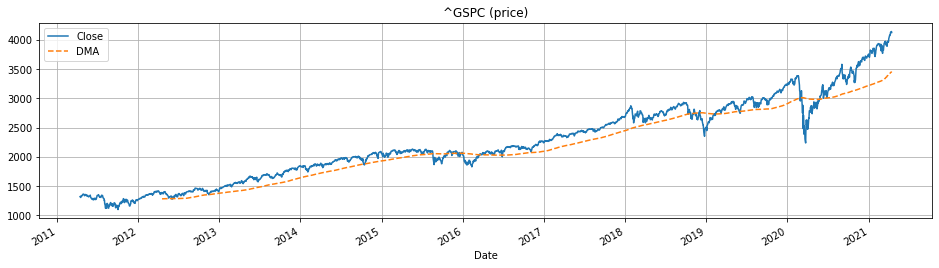

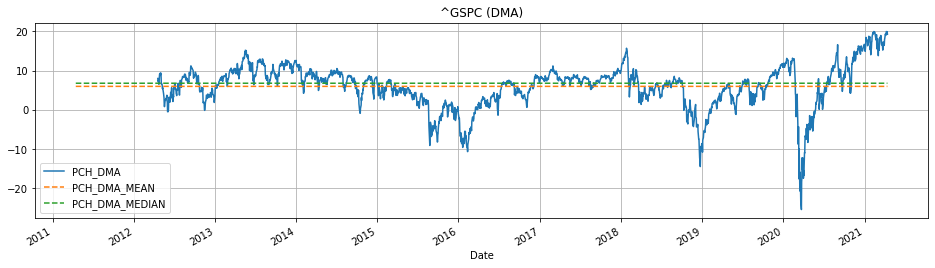

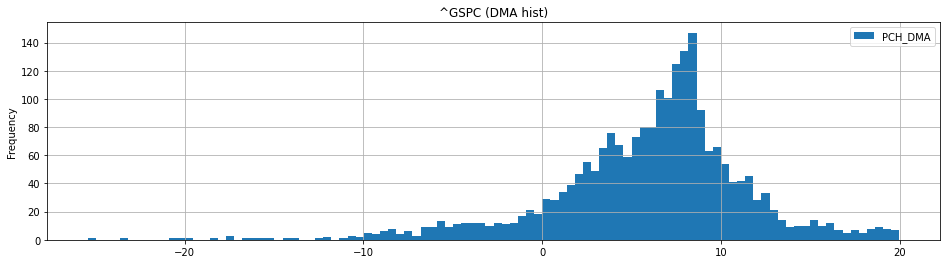

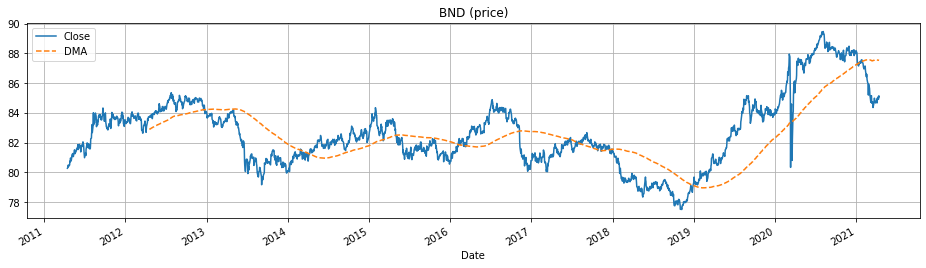

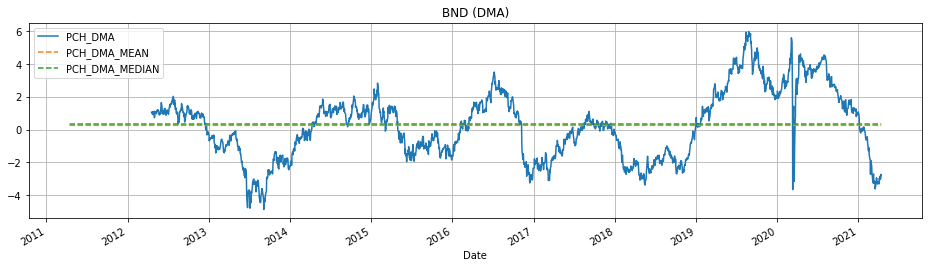

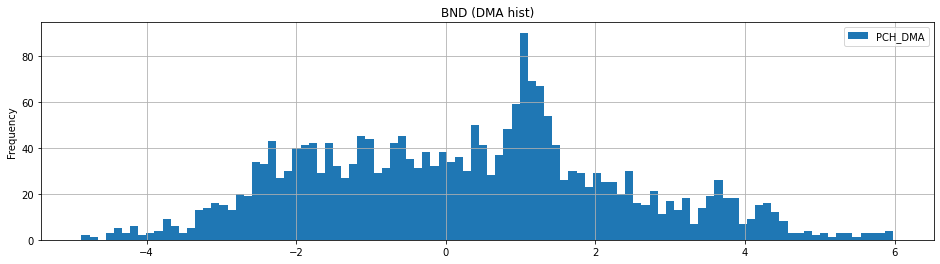

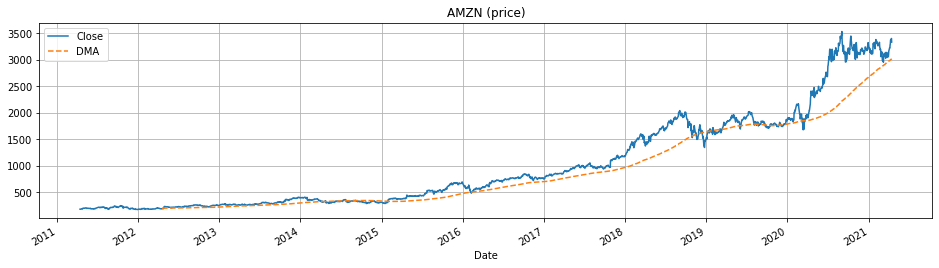

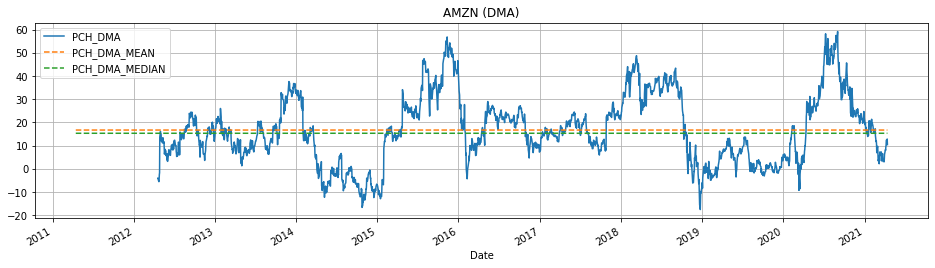

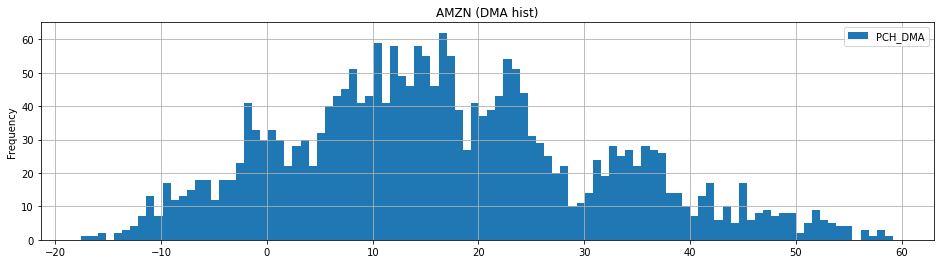

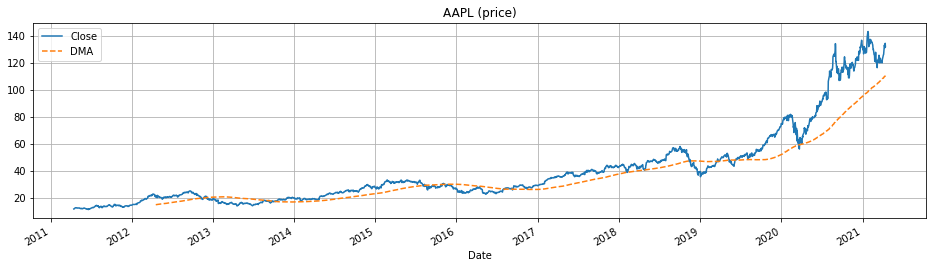

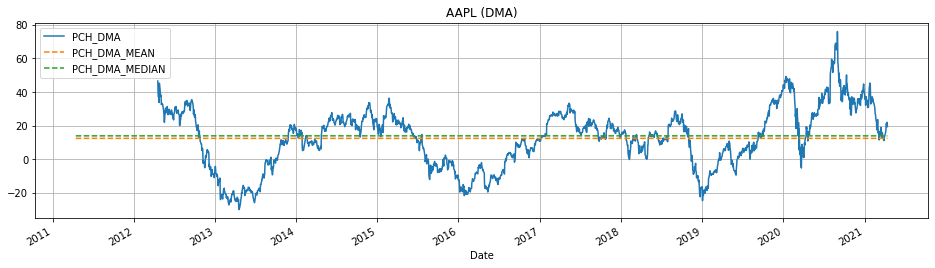

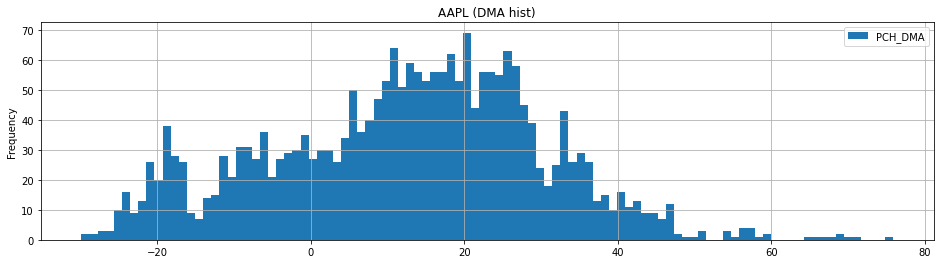

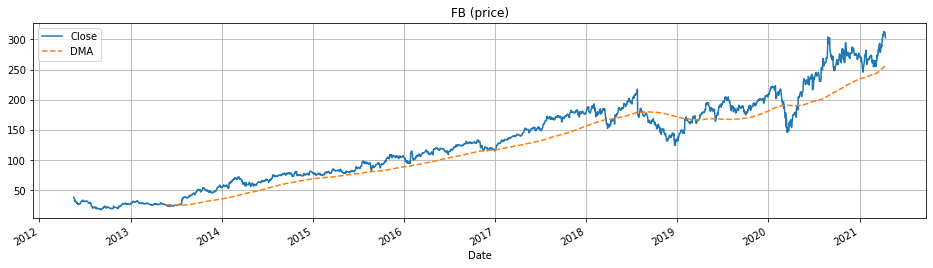

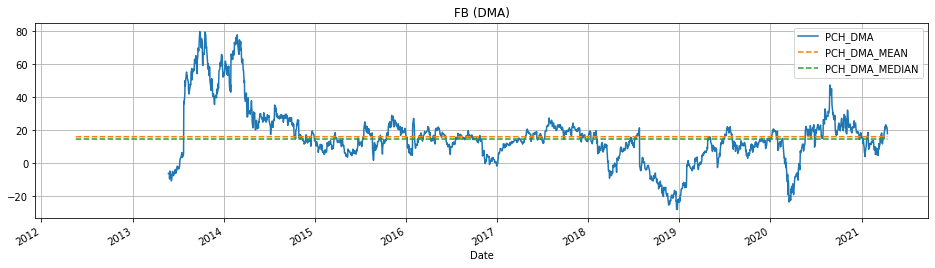

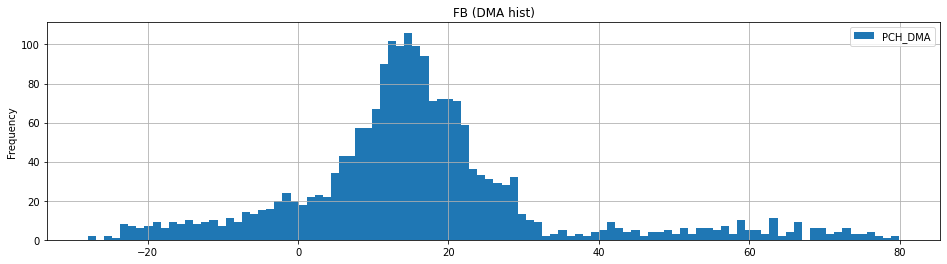

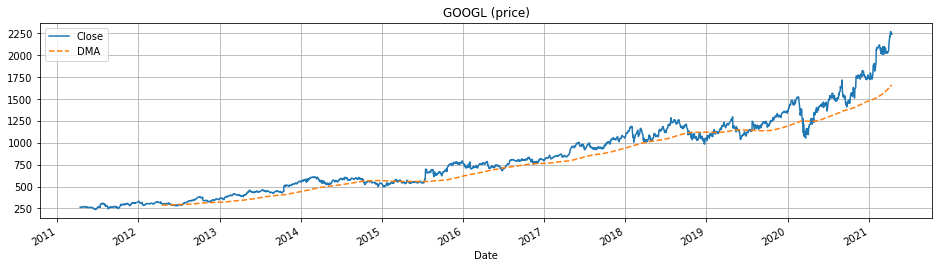

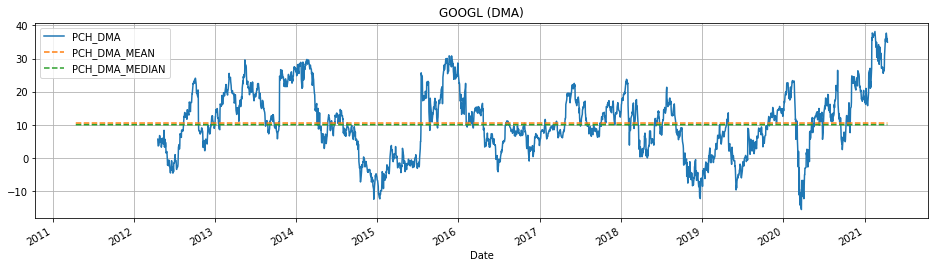

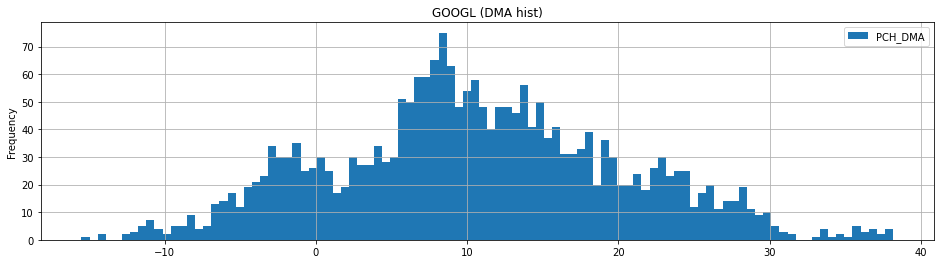

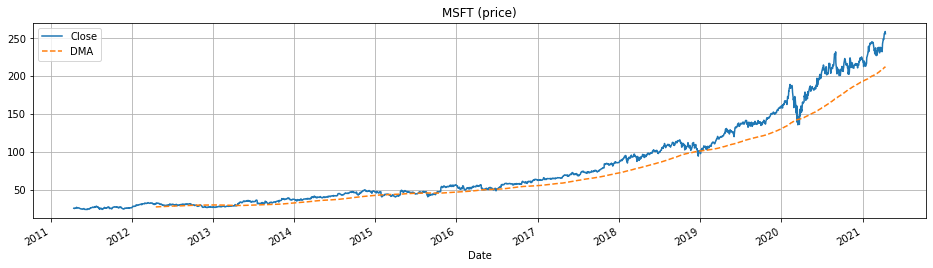

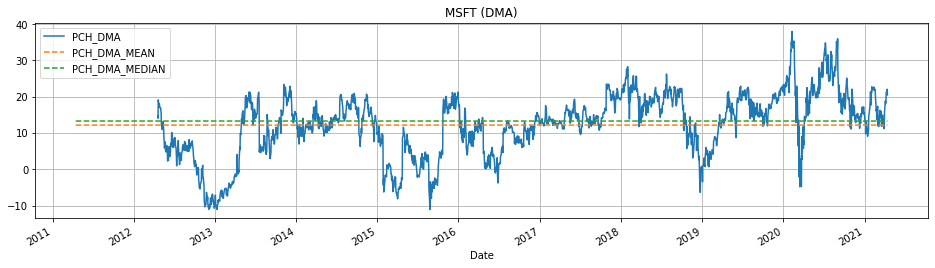

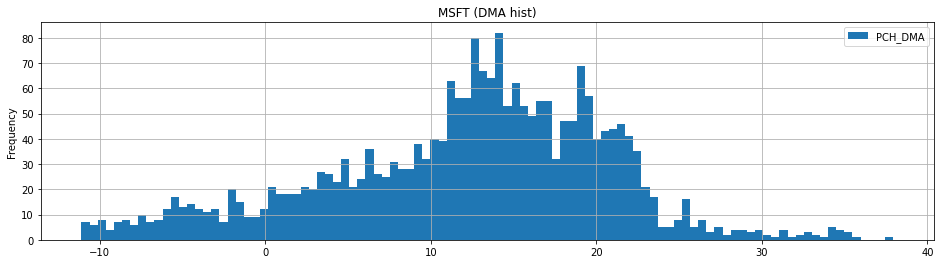

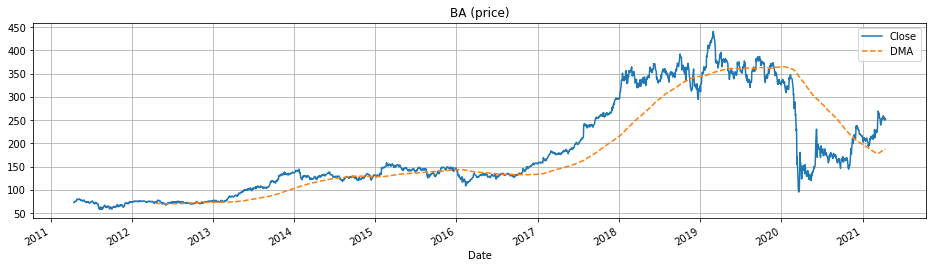

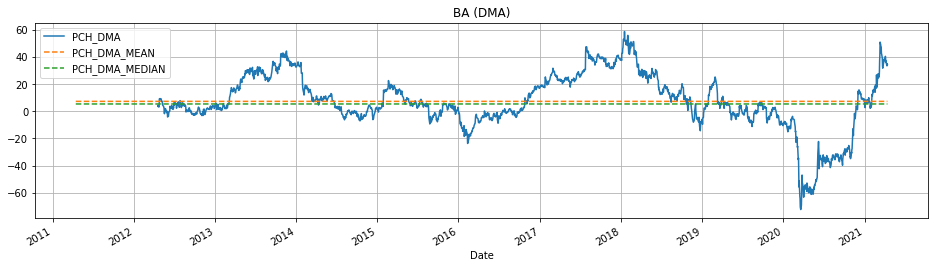

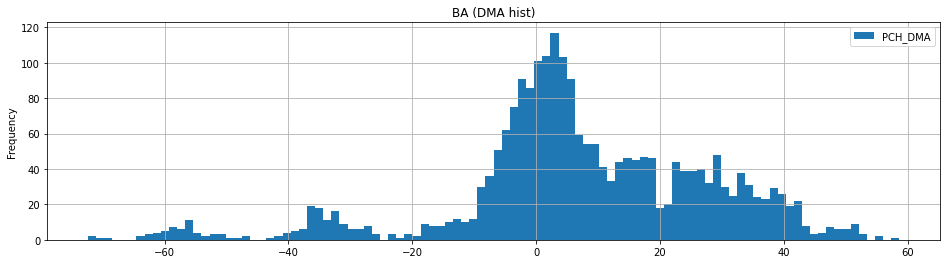

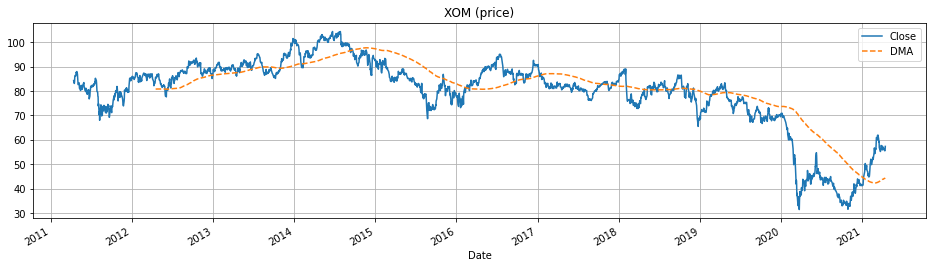

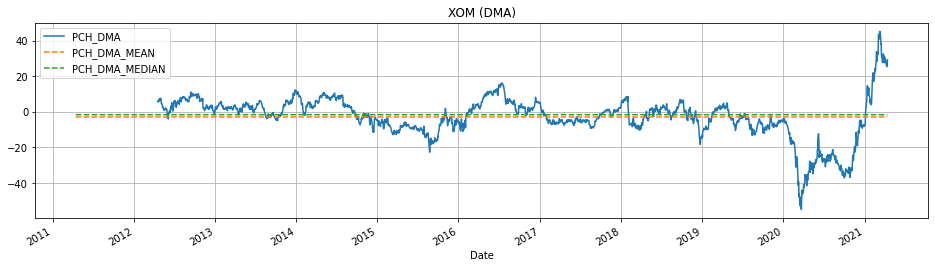

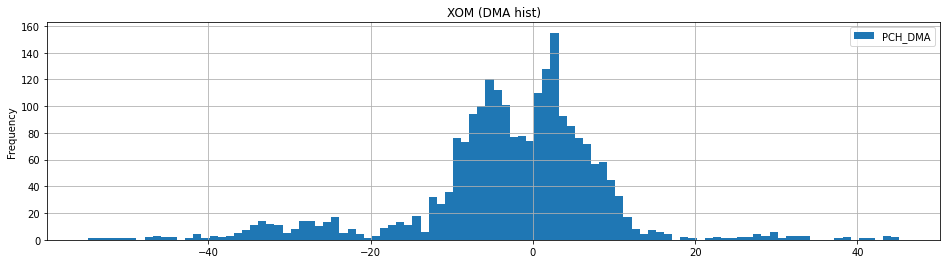

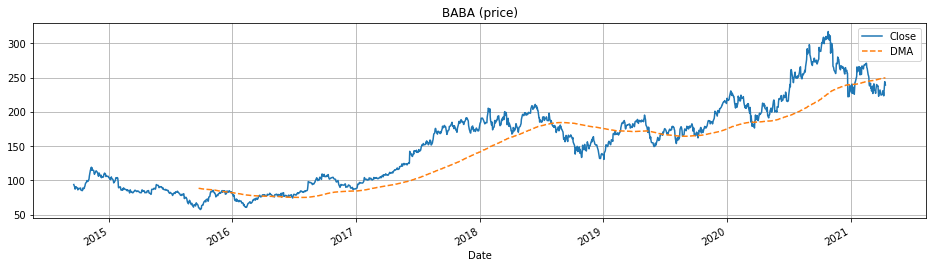

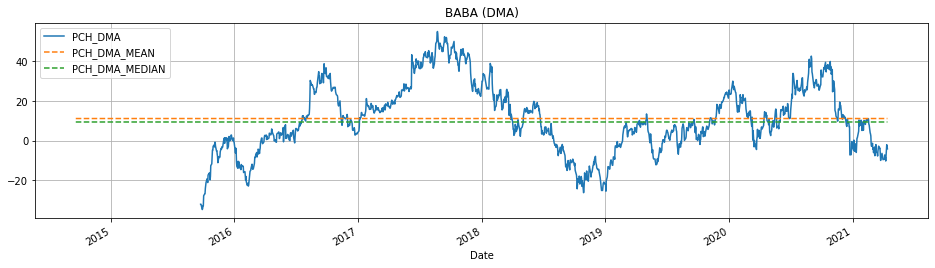

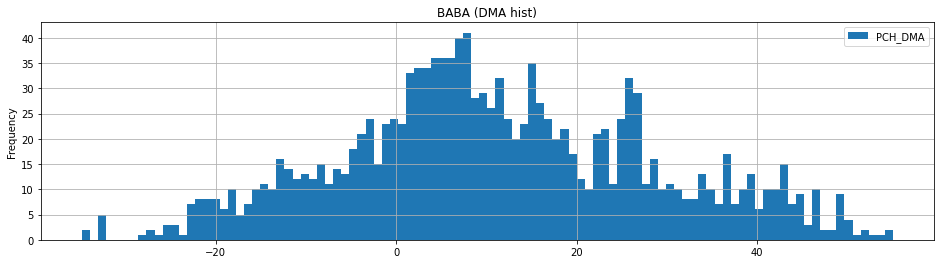

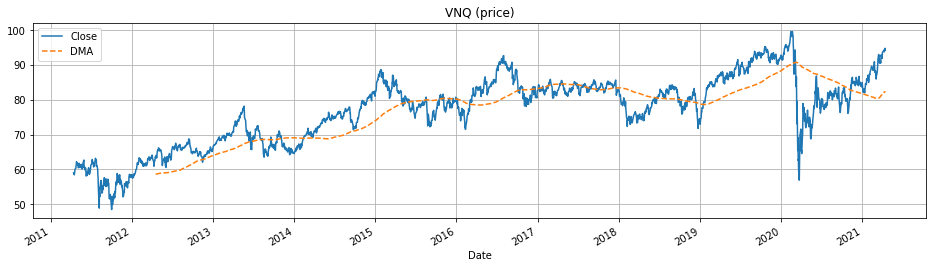

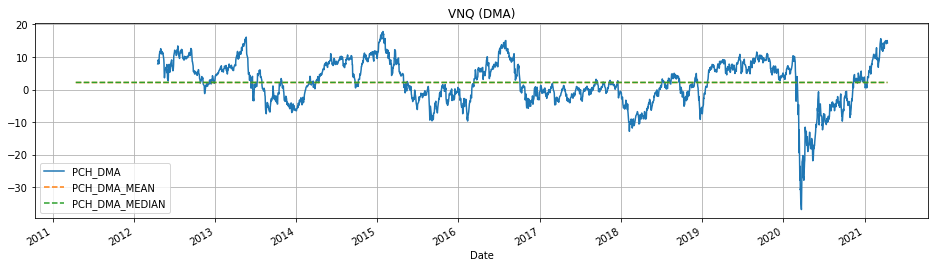

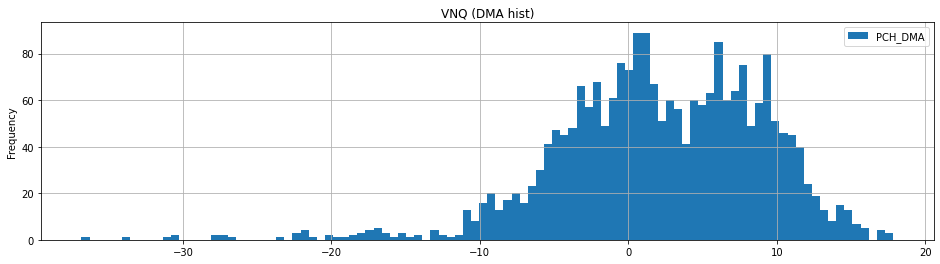

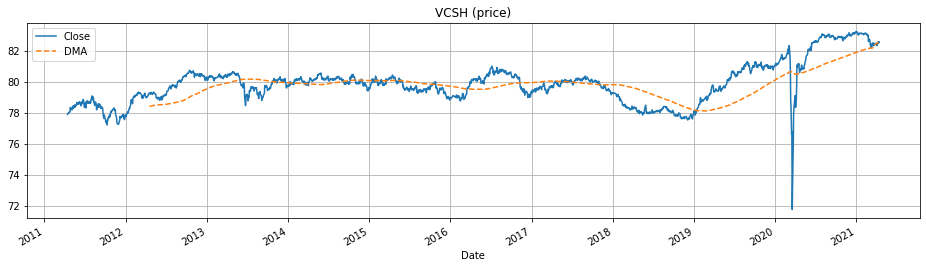

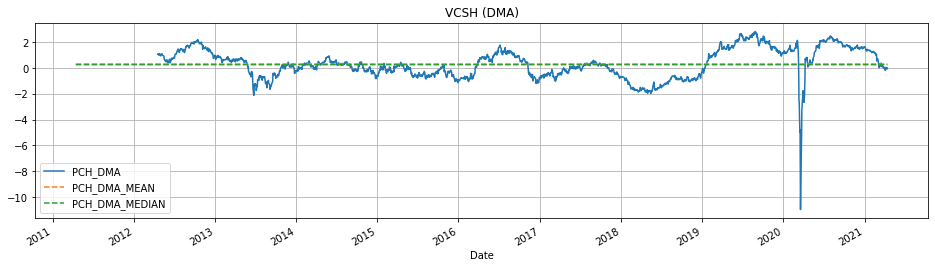

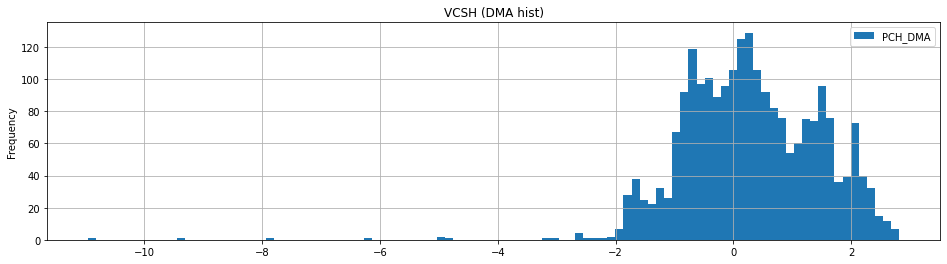

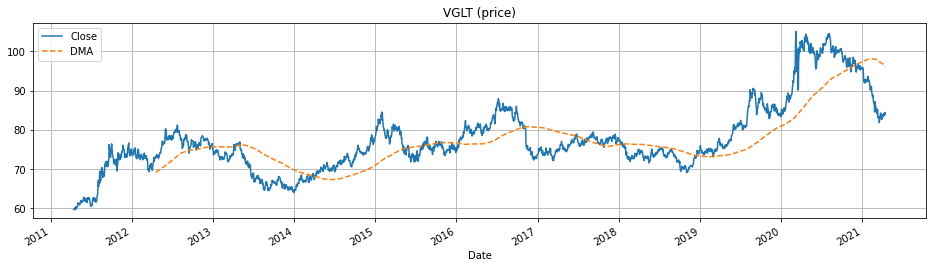

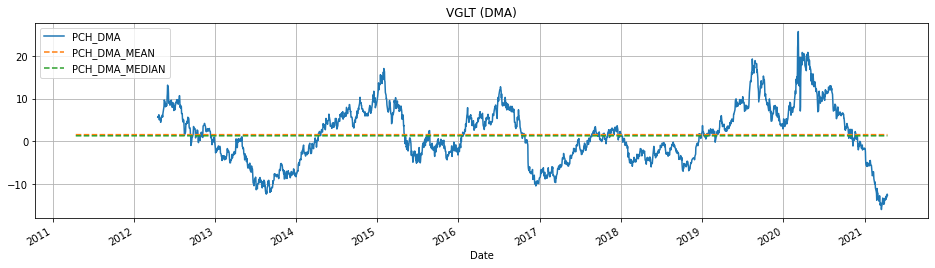

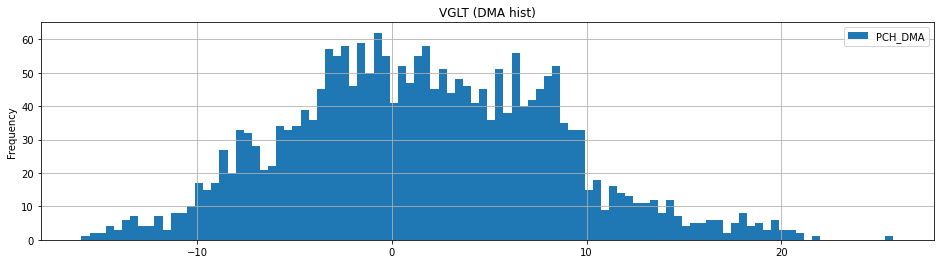

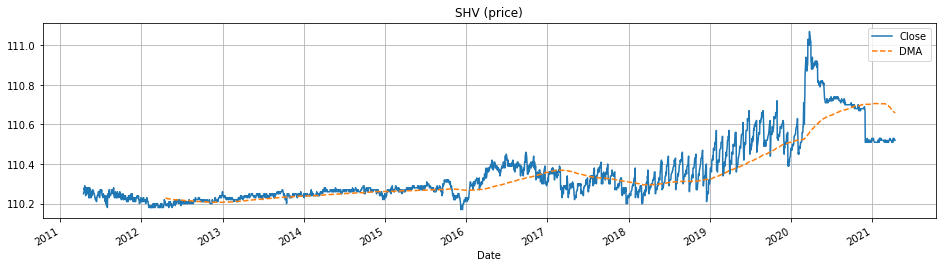

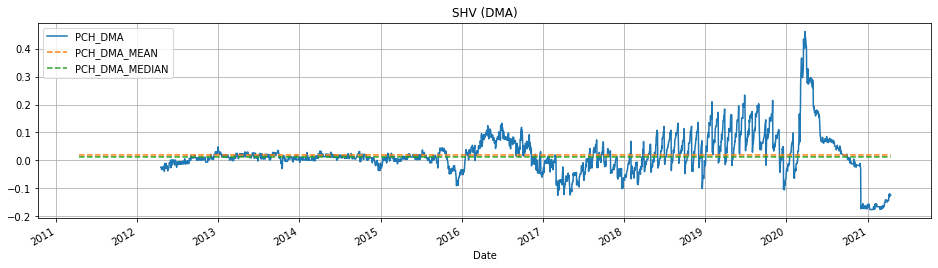

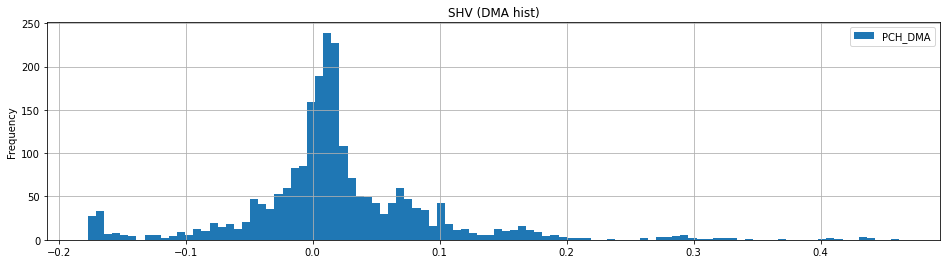

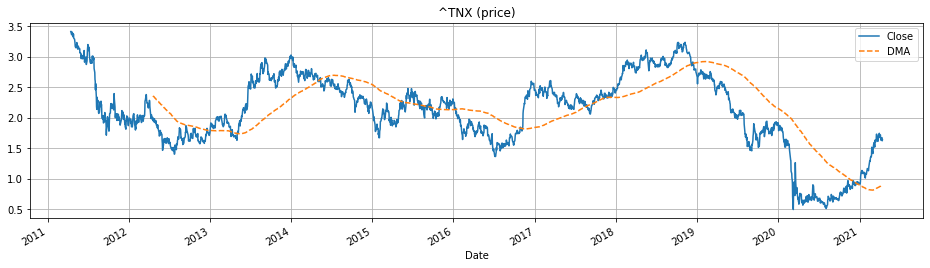

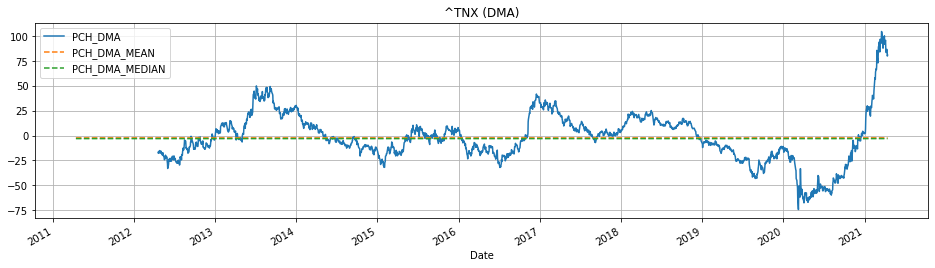

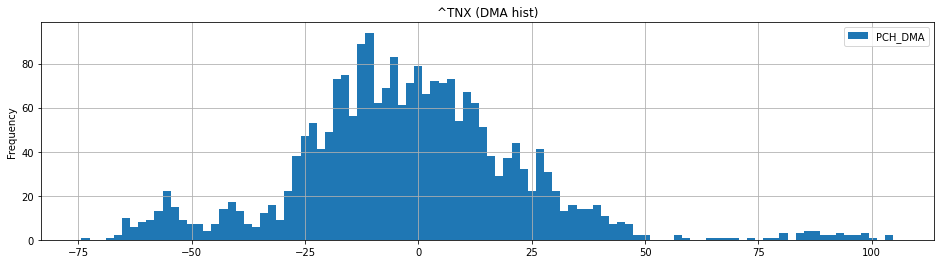

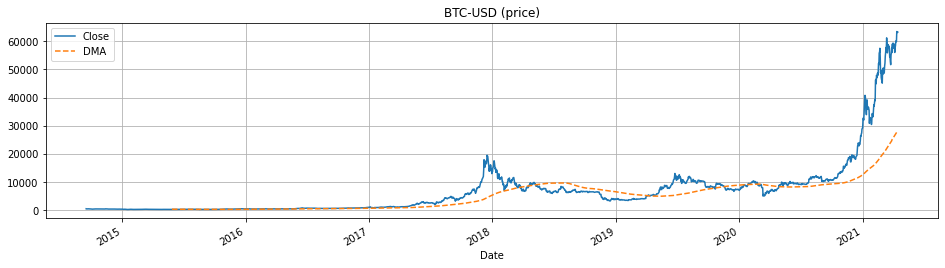

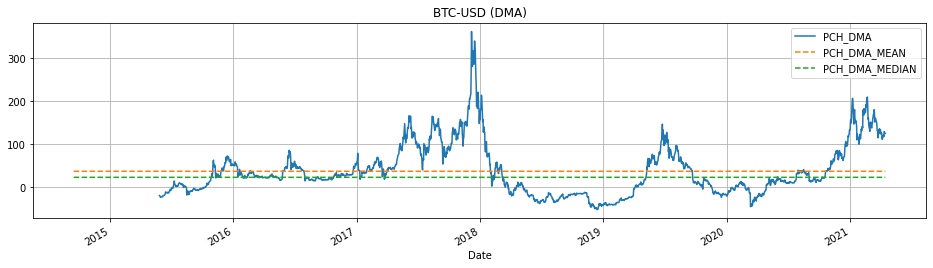

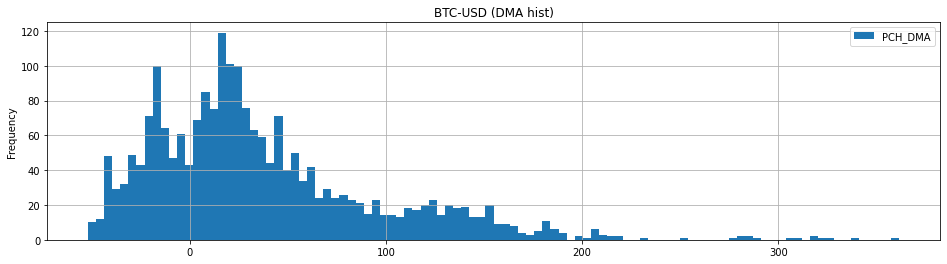

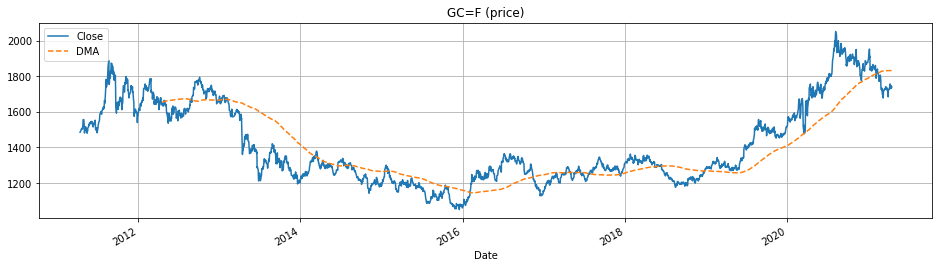

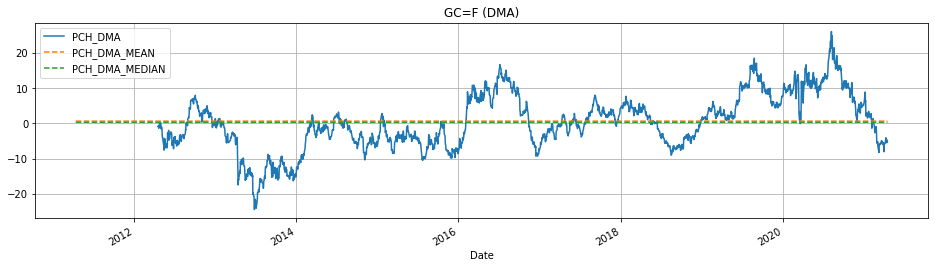

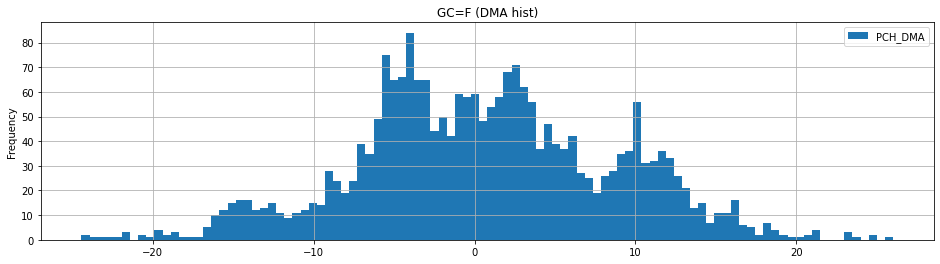

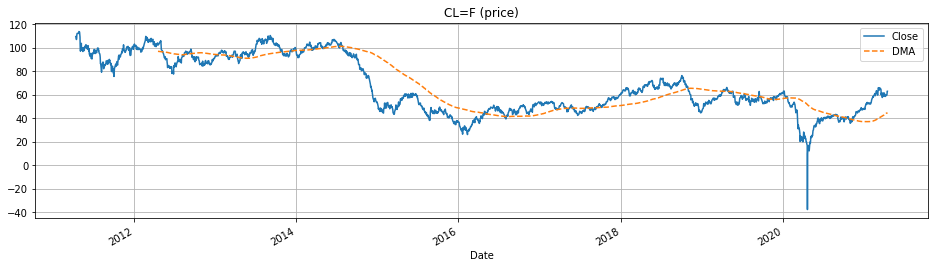

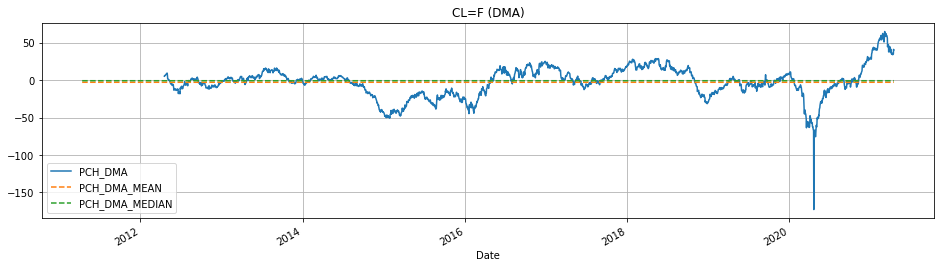

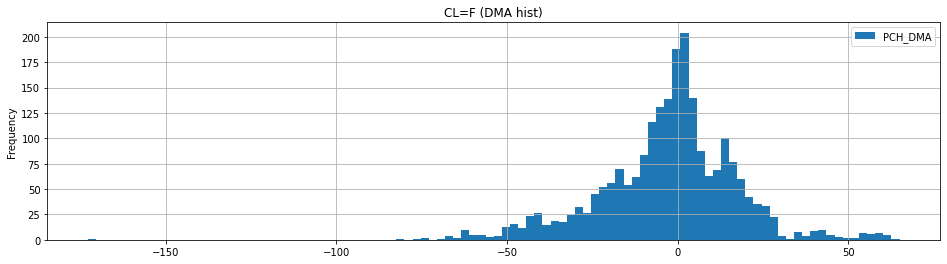

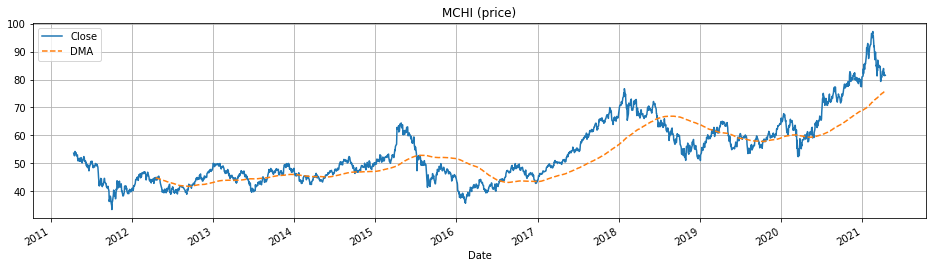

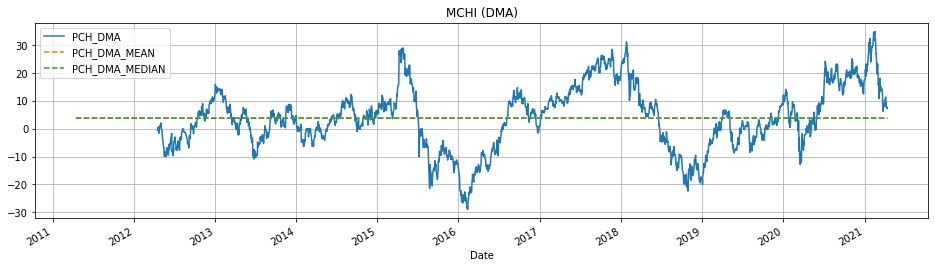

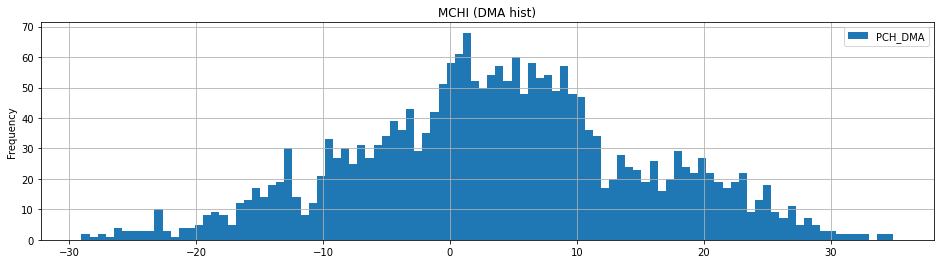

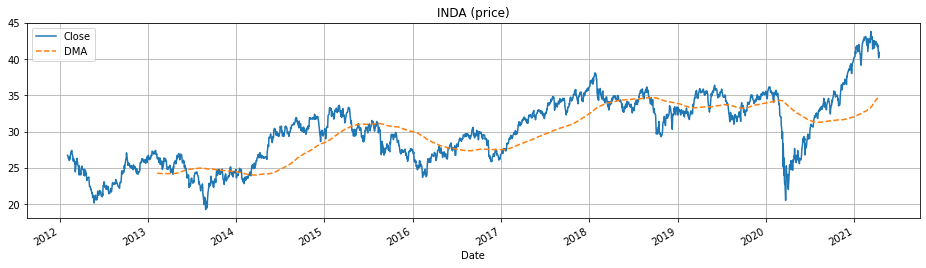

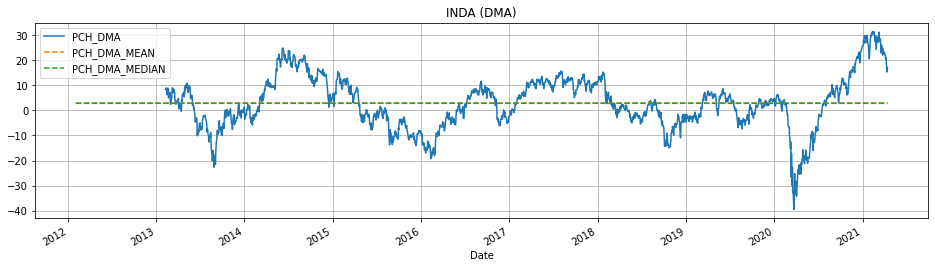

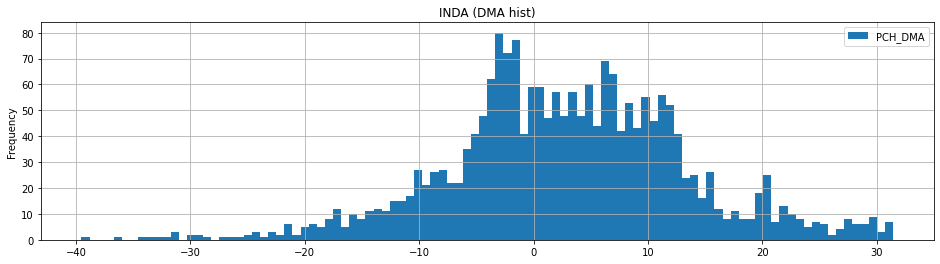

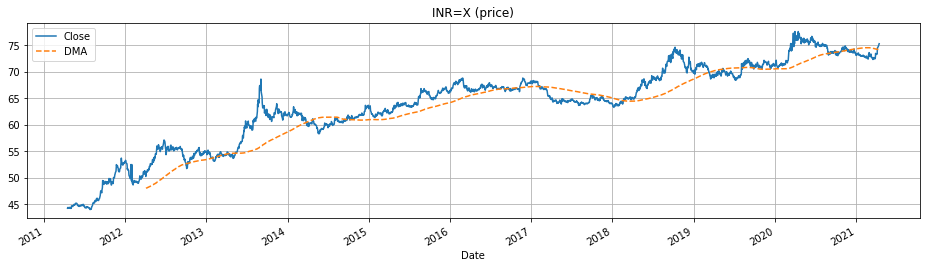

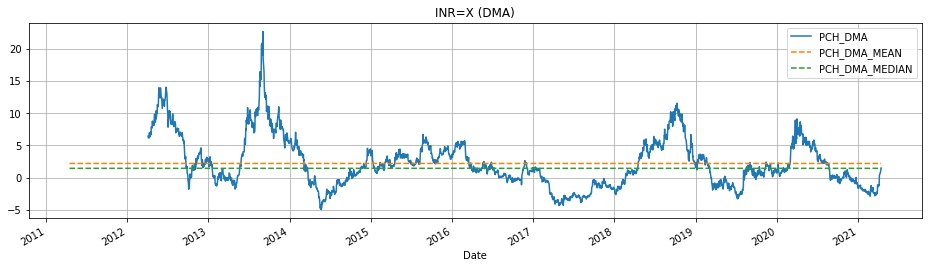

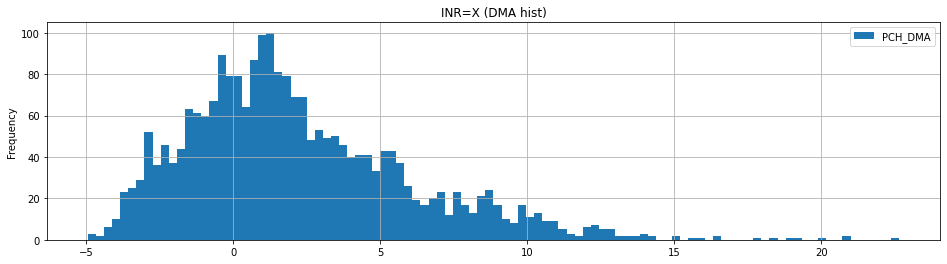

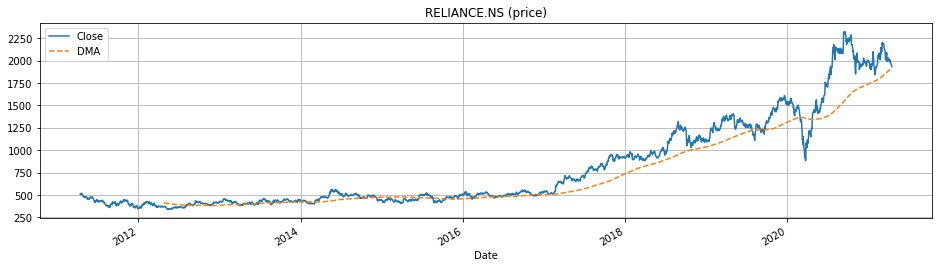

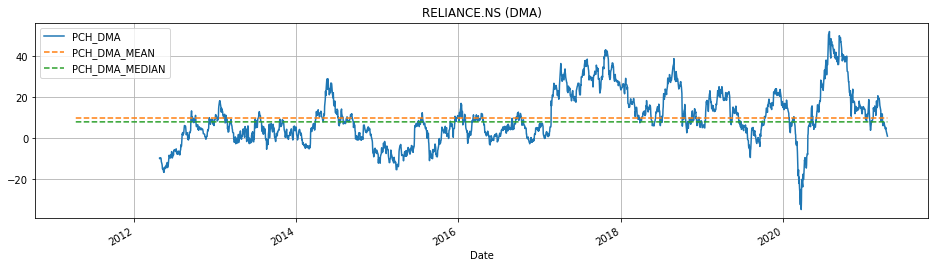

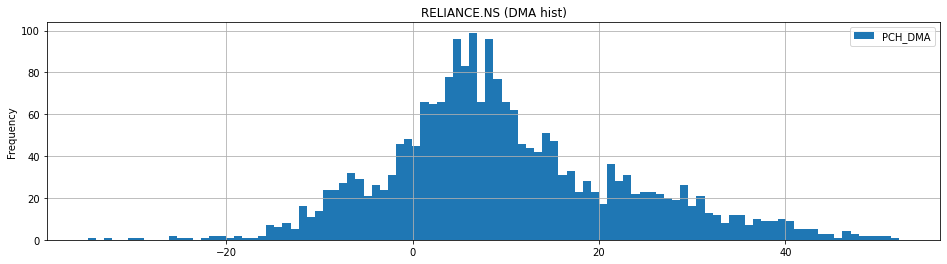

In [9]:
for t in dma_tickers:
    analyze_ticker_dma(t, ma_period=ma_period_1, start_date=ten_years)